In [53]:
import numpy as np
import pandas as pd

# get data
import pandas_datareader as pdr

# visual
import matplotlib.pyplot as plt
%matplotlib inline

#time
import datetime as datetime

#talib
import talib

In [54]:
start = datetime.datetime(2016,11,1)
df_0700 = pdr.DataReader('0700.HK', 'yahoo', start=start)

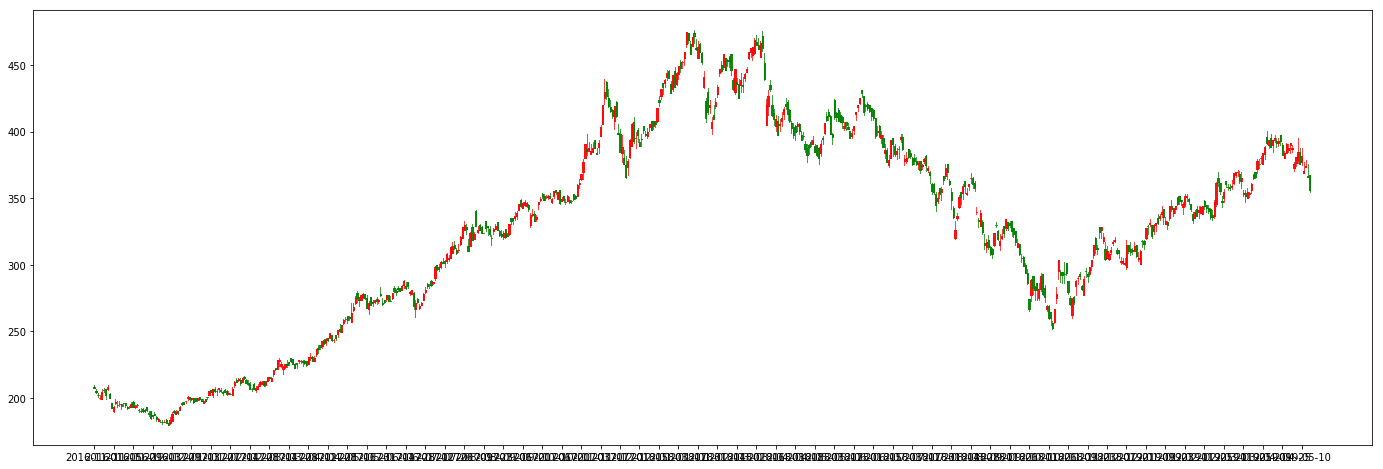

In [55]:
df_0700.index = df_0700.index.format(formatter=lambda x: x.strftime('%Y-%m-%d')) 

fig = plt.figure(figsize=(24, 8))

ax = fig.add_subplot(1, 1, 1)
ax.set_xticks(range(0, len(df_0700.index), 10))
ax.set_xticklabels(df_0700.index[::10])
mpf.candlestick2_ochl(ax, df_0700['Open'], df_0700['Close'], df_0700['High'],
                      df_0700['Low'], width=0.6, colorup='r', colordown='g', alpha=0.75); 

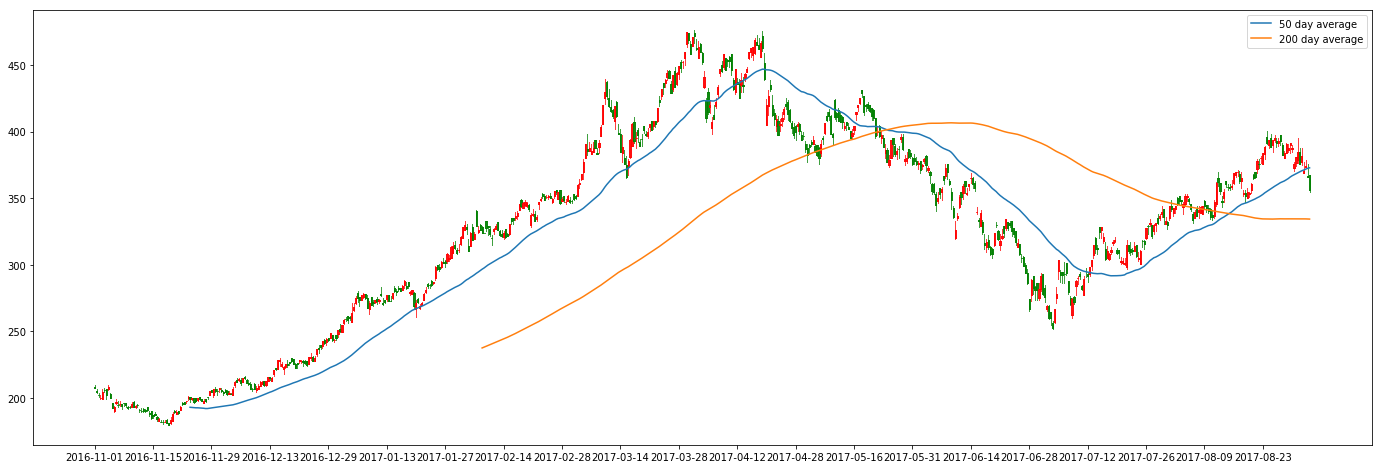

In [56]:
sma_50 = talib.SMA(np.array(df_0700['Close']), 50)
sma_200 = talib.SMA(np.array(df_0700['Close']), 200)

fig = plt.figure(figsize=(24, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xticks(range(0, len(df_0700.index), 30))
ax.set_xticklabels(df_0700.index[::10])
mpf.candlestick2_ochl(ax, df_0700['Open'], df_0700['Close'], df_0700['High'],
                      df_0700['Low'], width=0.6, colorup='r', colordown='g', alpha=0.75)
ax.plot(sma_50, label='50 day average')
ax.plot(sma_200, label='200 day average')
ax.legend();

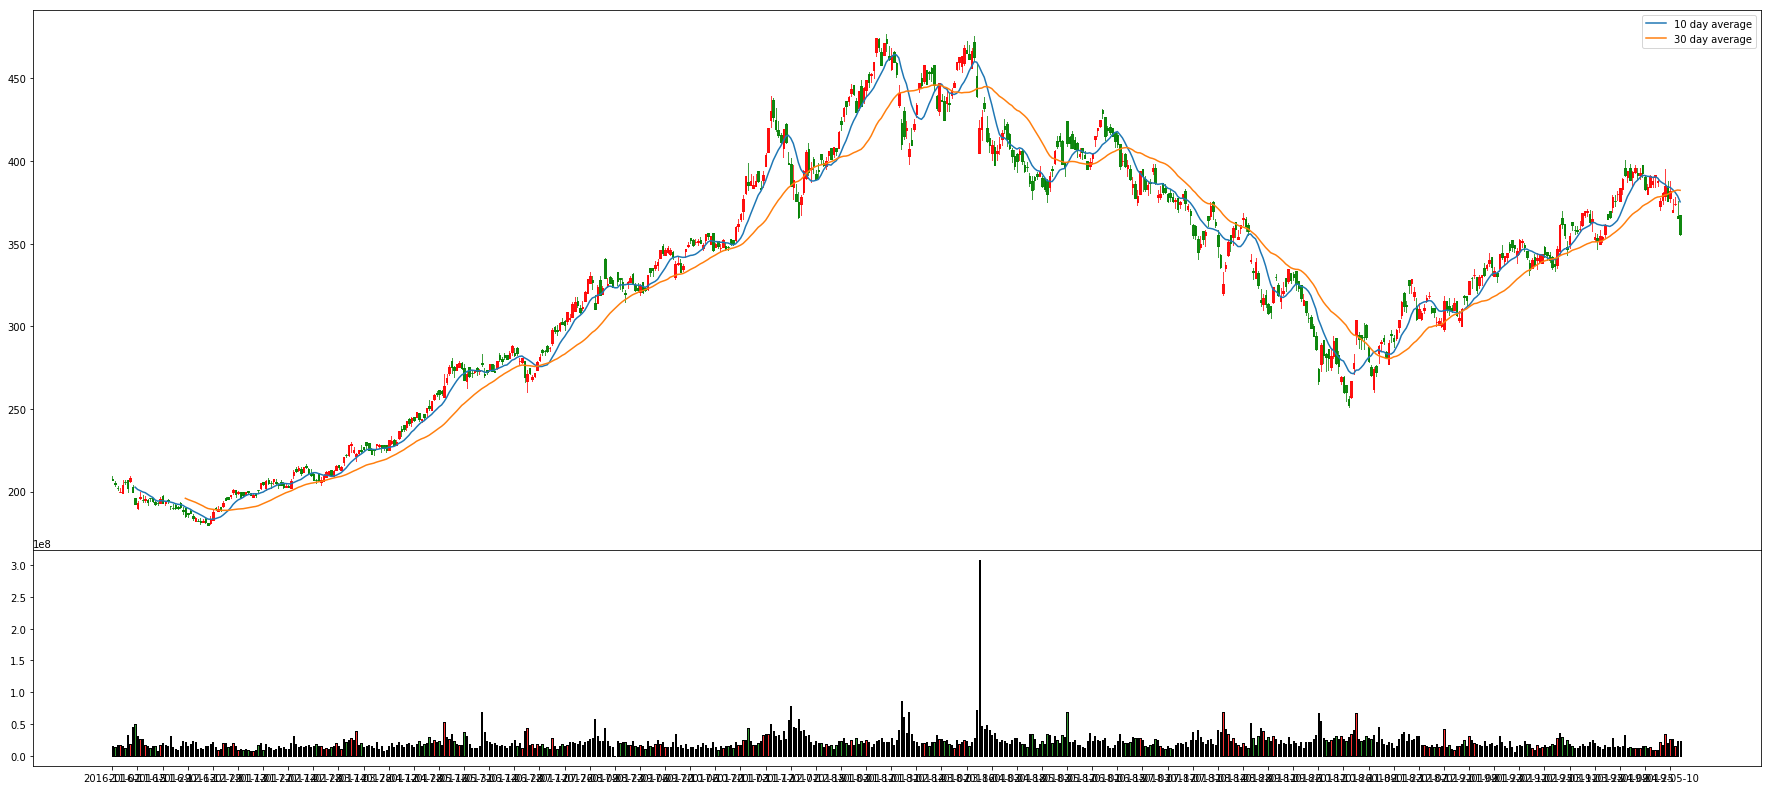

In [57]:
sma_10 = talib.SMA(np.array(df_0700['Close']), 10)
sma_30 = talib.SMA(np.array(df_0700['Close']), 30)

fig = plt.figure(figsize=(24, 15))
ax = fig.add_axes([0,0.2,1,0.5])
ax2 = fig.add_axes([0,0,1,0.2])

ax.set_xticks(range(0, len(df_0700.index), 10))
ax.set_xticklabels(df_0700.index[::10])
mpf.candlestick2_ochl(ax, df_0700['Open'], df_0700['Close'], df_0700['High'],
                      df_0700['Low'], width=0.6, colorup='r', colordown='g', alpha=0.75)

ax.plot(sma_10, label='10 day average')
ax.plot(sma_30, label='30 day average')

mpf.volume_overlay(ax2, df_0700['Open'], df_0700['Close'], df_0700['Volume'], colorup='r', colordown='g', width=0.5, alpha=0.8)
ax2.set_xticks(range(0, len(df_0700.index), 10))
ax2.set_xticklabels(df_0700.index[::10])

ax.legend();

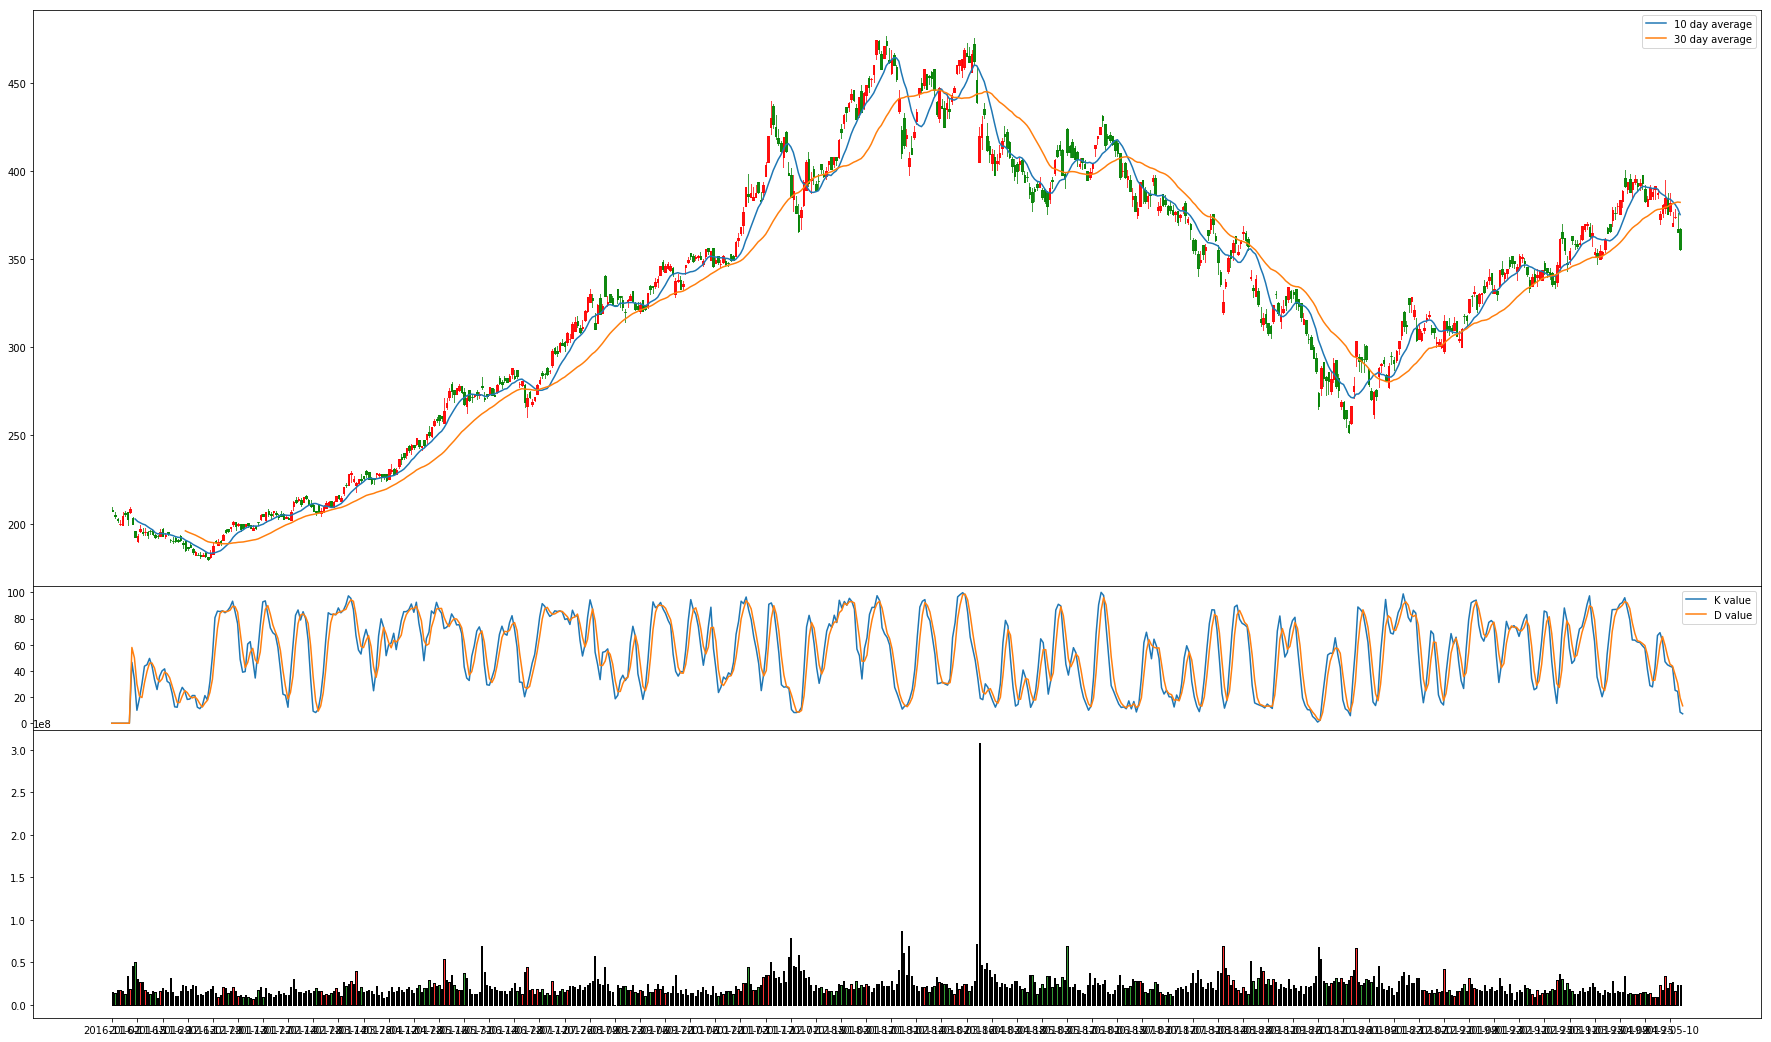

In [58]:
sma_10 = talib.SMA(np.array(df_0700['Close']), 10)
sma_30 = talib.SMA(np.array(df_0700['Close']), 30)
df_0700['k'], df_0700['d'] = talib.STOCH(df_0700['High'], df_0700['Low'], df_0700['Close'])
df_0700['k'].fillna(value=0, inplace=True)
df_0700['d'].fillna(value=0, inplace=True)

fig = plt.figure(figsize=(24, 20))
ax = fig.add_axes([0,0.3,1,0.4])
ax2 = fig.add_axes([0,0.2,1,0.1])
ax3 = fig.add_axes([0,0,1,0.2])

ax.set_xticks(range(0, len(df_0700.index), 10))
ax.set_xticklabels(df_0700.index[::10])
mpf.candlestick2_ochl(ax, df_0700['Open'], df_0700['Close'], df_0700['High'],
                      df_0700['Low'], width=0.6, colorup='r', colordown='g', alpha=0.75)
plt.rcParams['font.sans-serif']=['Microsoft JhengHei'] 
ax.plot(sma_10, label='10 day average')
ax.plot(sma_30, label='30 day average')

ax2.plot(df_0700['k'], label='K value')
ax2.plot(df_0700['d'], label='D value')
ax2.set_xticks(range(0, len(df_0700.index), 10))
ax2.set_xticklabels(df_0700.index[::10])

mpf.volume_overlay(ax3, df_0700['Open'], df_0700['Close'], df_0700['Volume'], colorup='r', colordown='g', width=0.5, alpha=0.8)
ax3.set_xticks(range(0, len(df_0700.index), 10))
ax3.set_xticklabels(df_0700.index[::10])

ax.legend();
ax2.legend();